In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [21]:


csv_path = "C:/Users/PC/OneDrive/Documents/Timesr/traffic.csv"
data = pd.read_csv(csv_path)

data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [22]:
# Step 1: Convert 'DateTime' to datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Step 2: Handling missing values
# Check for missing values in each column
missing_values = data.isnull().sum()

# Step 3: Outlier Detection
# Define a function to calculate IQR for 'Vehicles' and detect outliers
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)].index
    return outlier_indices

outliers = detect_outliers(data, 'Vehicles')

# Step 4: Feature Engineering
# Extract additional time features
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month

# Step 5: Normalization
# Normalize 'Vehicles' using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Vehicles_Norm'] = scaler.fit_transform(data[['Vehicles']])

# Displaying the updated DataFrame and any missing values or outliers detected
data.head(), missing_values, data.loc[outliers]


(             DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
 0 2015-11-01 00:00:00         1        15  20151101001     0          6   
 1 2015-11-01 01:00:00         1        13  20151101011     1          6   
 2 2015-11-01 02:00:00         1        10  20151101021     2          6   
 3 2015-11-01 03:00:00         1         7  20151101031     3          6   
 4 2015-11-01 04:00:00         1         9  20151101041     4          6   
 
    Month  Vehicles_Norm  
 0     11       0.078212  
 1     11       0.067039  
 2     11       0.050279  
 3     11       0.033520  
 4     11       0.044693  ,
 DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64,
                  DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
 2603  2016-02-17 11:00:00         1        70  20160217111    11          2   
 2890  2016-02-29 10:00:00         1        64  20160229101    10          0   
 2891  2016-02-29 11:00:00         1        62  20160229111    1

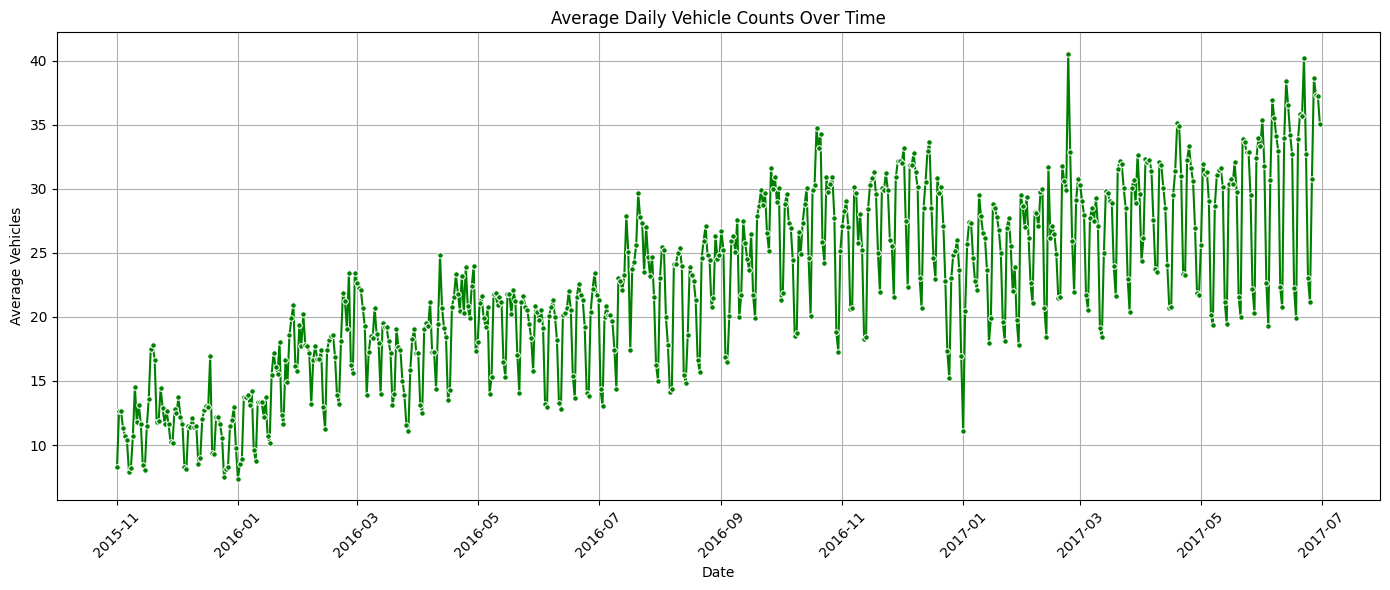

In [23]:
# Calculate the average vehicles per hour over time
data['Date'] = data['DateTime'].dt.date
average_vehicles = data.groupby('Date')['Vehicles'].mean().reset_index()

# Plotting the average vehicles over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Vehicles', data=average_vehicles, marker='o', markersize=4, color='green')
plt.title('Average Daily Vehicle Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Average Vehicles')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_9284\434798085.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], x='Hour', y='Vehicles', data=average_vehicles_hour, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_9284\434798085.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], x='DayOfWeek', y='Vehicles', data=average_vehicles_day_of_week, palette='viridis')


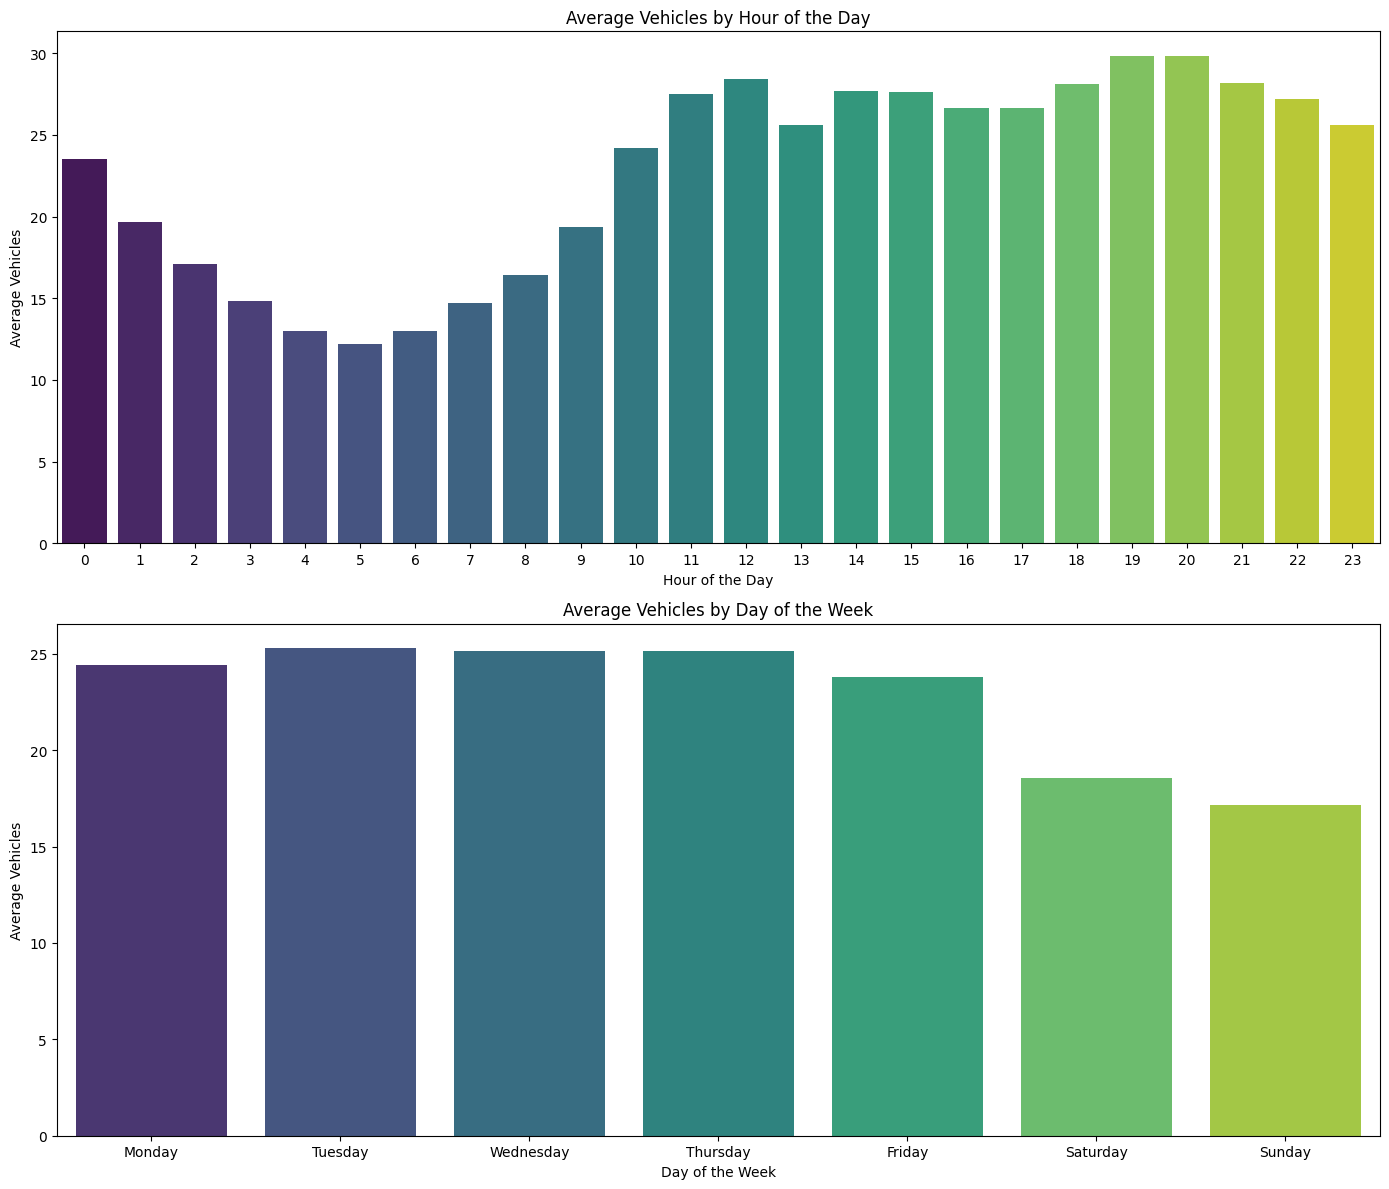

In [24]:
# Calculate the average vehicles per hour of the day and per day of the week
average_vehicles_hour = data.groupby('Hour')['Vehicles'].mean().reset_index()
average_vehicles_day_of_week = data.groupby('DayOfWeek')['Vehicles'].mean().reset_index()

# Map the 'DayOfWeek' to actual day names for better readability
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_vehicles_day_of_week['DayOfWeek'] = average_vehicles_day_of_week['DayOfWeek'].map(days)

# Create plots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot for average vehicles by hour of the day
sns.barplot(ax=ax[0], x='Hour', y='Vehicles', data=average_vehicles_hour, palette='viridis')
ax[0].set_title('Average Vehicles by Hour of the Day')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Average Vehicles')

# Plot for average vehicles by day of the week
sns.barplot(ax=ax[1], x='DayOfWeek', y='Vehicles', data=average_vehicles_day_of_week, palette='viridis')
ax[1].set_title('Average Vehicles by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Vehicles')

plt.tight_layout()
plt.show()



                 DateTime  Vehicles   7_day_MA  30_day_MA
0     2015-11-01 00:00:00        15        NaN        NaN
14592 2015-11-01 00:00:00         6        NaN        NaN
29184 2015-11-01 00:00:00         9        NaN        NaN
29185 2015-11-01 01:00:00         7        NaN        NaN
1     2015-11-01 01:00:00        13        NaN        NaN
14593 2015-11-01 01:00:00         6        NaN        NaN
14594 2015-11-01 02:00:00         5   8.714286        NaN
2     2015-11-01 02:00:00        10   8.000000        NaN
29186 2015-11-01 02:00:00         5   7.857143        NaN
14595 2015-11-01 03:00:00         6   7.428571        NaN
29187 2015-11-01 03:00:00         1   6.571429        NaN
3     2015-11-01 03:00:00         7   5.714286        NaN
14596 2015-11-01 04:00:00         7   5.857143        NaN
29188 2015-11-01 04:00:00         2   5.428571        NaN
4     2015-11-01 04:00:00         9   5.285714        NaN
14597 2015-11-01 05:00:00         2   4.857143        NaN
5     2015-11-

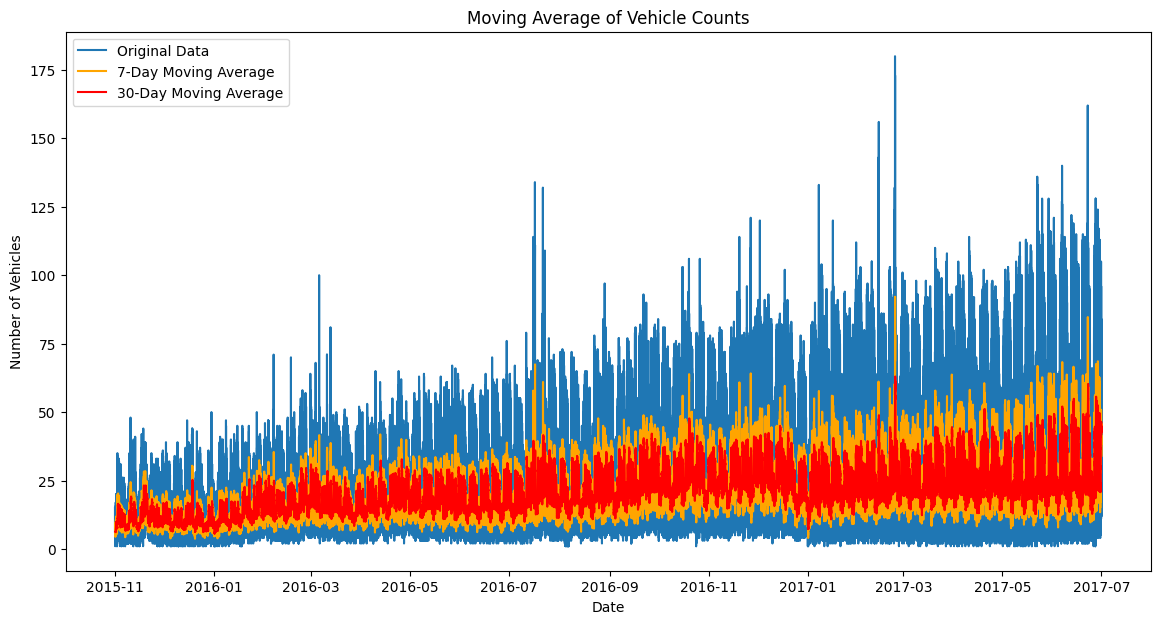

In [25]:
import pandas as pd

# Đọc dữ liệu
file_path = 'C:/Users/PC/OneDrive/Documents/Timesr/traffic.csv'
data = pd.read_csv(file_path)

# Chuyển đổi cột DateTime sang dạng datetime
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sắp xếp dữ liệu theo thời gian
data = data.sort_values(by='DateTime')

# Tính toán Moving Average với cửa sổ 7 ngày
data['7_day_MA'] = data['Vehicles'].rolling(window=7).mean()

# Tính toán Moving Average với cửa sổ 30 ngày
data['30_day_MA'] = data['Vehicles'].rolling(window=30).mean()

# Hiển thị kết quả
print(data[['DateTime', 'Vehicles', '7_day_MA', '30_day_MA']].head(50))

# Vẽ biểu đồ để trực quan hóa kết quả
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['DateTime'], data['Vehicles'], label='Original Data')
plt.plot(data['DateTime'], data['7_day_MA'], label='7-Day Moving Average', color='orange')
plt.plot(data['DateTime'], data['30_day_MA'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Moving Average of Vehicle Counts')
plt.legend()
plt.show()


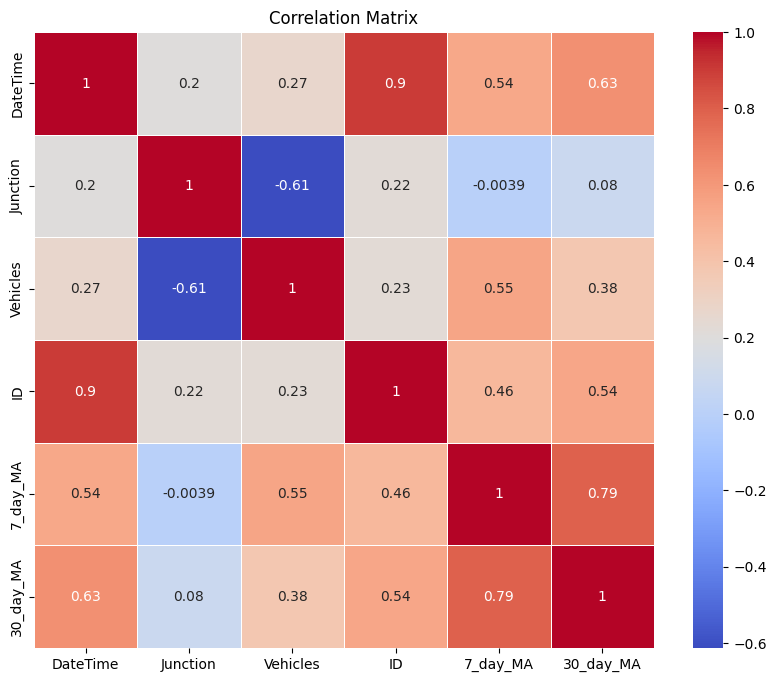

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

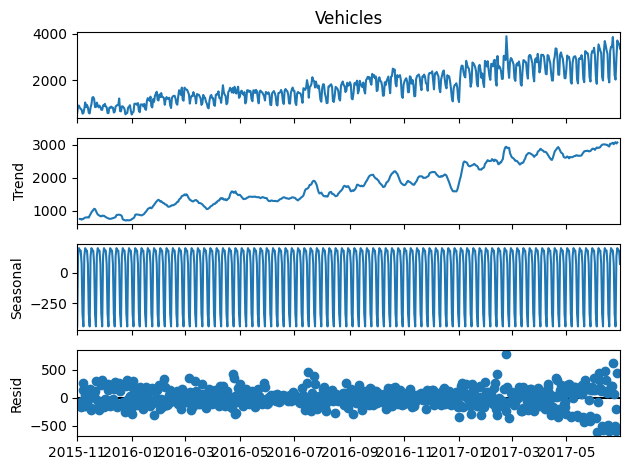

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the frequency to daily as the data is sampled hourly and aggregating by day to simplify
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)
daily_data = data['Vehicles'].resample('D').sum()

# Decomposing the time series
decomposition = seasonal_decompose(daily_data, model='additive')

# Plotting the decomposed components of the time series
decomposition.plot()
plt.show()


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet

SARIMA và prophet


ADF Statistic: -0.089411
p-value: 0.950483
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


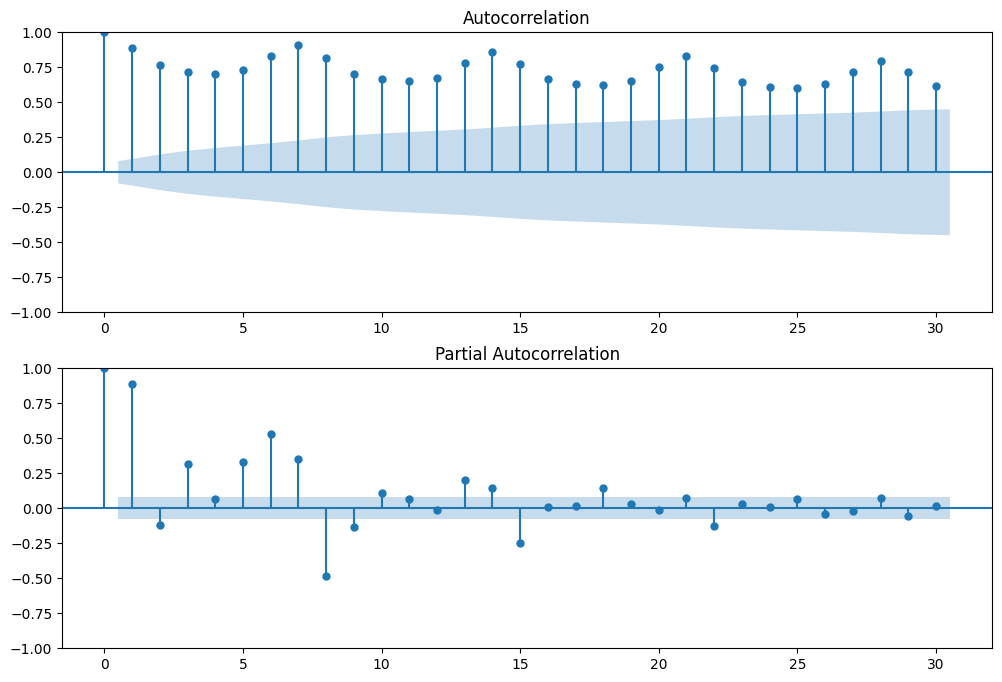

                                     SARIMAX Results                                     
Dep. Variable:                          Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3884.177
Date:                           Fri, 21 Jun 2024   AIC                           7778.353
Time:                                   21:33:50   BIC                           7800.338
Sample:                               11-01-2015   HQIC                          7786.911
                                    - 06-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7002      0.027     25.779      0.000       0.647       0.753
ma.L1         -0.9999      0.188     -5.308

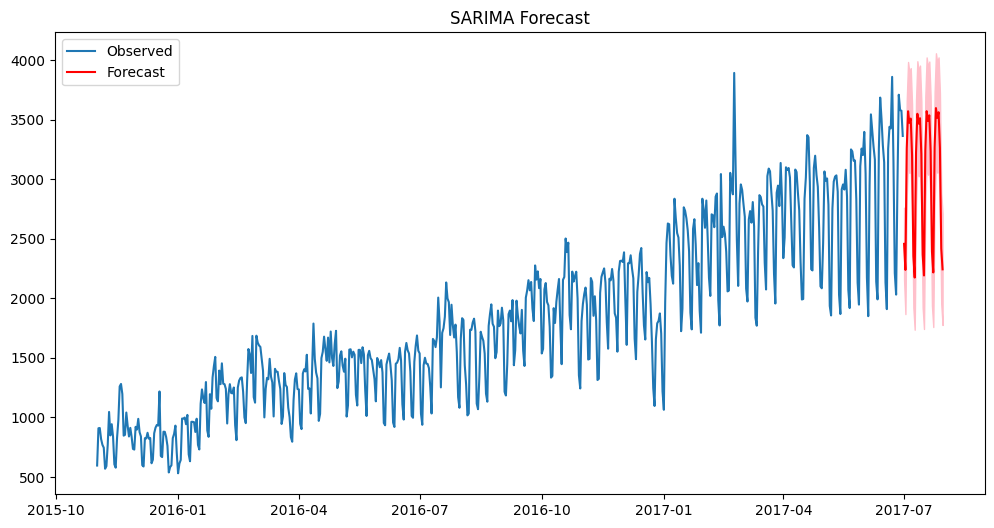

21:33:50 - cmdstanpy - INFO - Chain [1] start processing
21:33:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


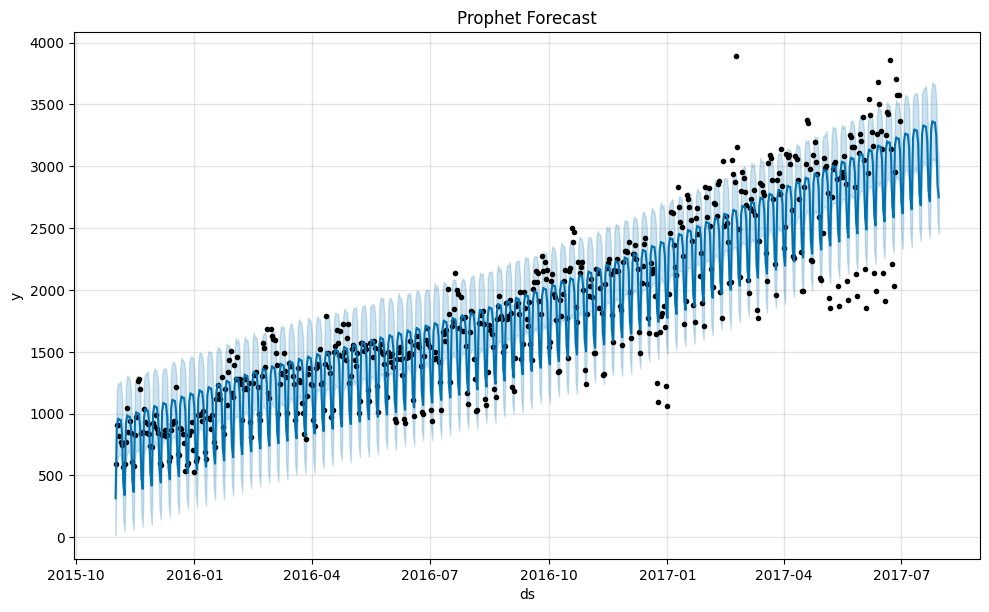

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


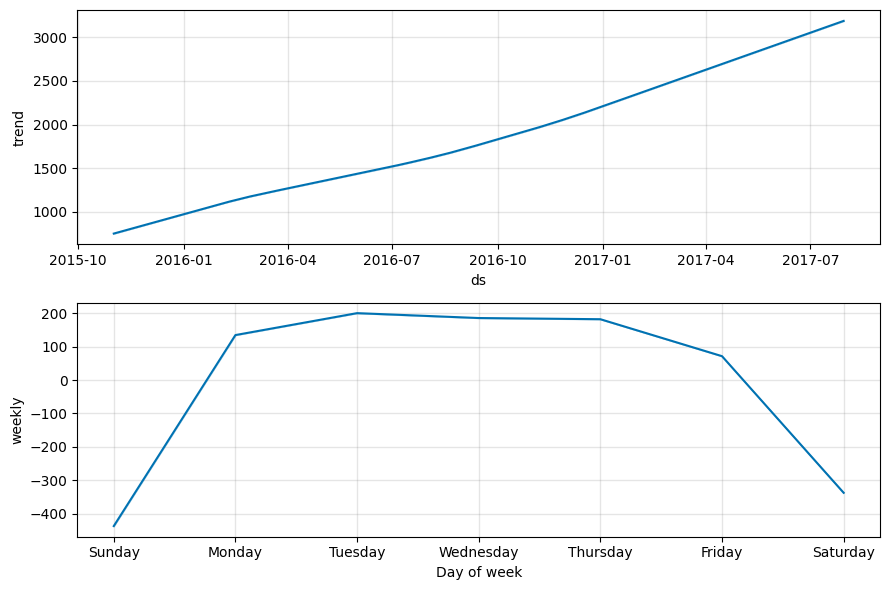

In [29]:
# Load the data
data = pd.read_csv('C:/Users/PC/OneDrive/Documents/Timesr/traffic.csv')

# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Resample data to daily frequency
data.set_index('DateTime', inplace=True)
daily_data = data['Vehicles'].resample('D').sum()

# Function to check stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Check stationarity
test_stationarity(daily_data)

# Plot ACF and PACF to determine p, d, q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_data, lags=30, ax=ax[0])
plot_pacf(daily_data, lags=30, ax=ax[1])
plt.show()

# Fit SARIMA model
p = 1  # From PACF plot
d = 1  # Differencing to make data stationary
q = 1  # From ACF plot
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing
Q = 1  # Seasonal moving average order
m = 7  # Weekly seasonality

sarima_model = SARIMAX(daily_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_results = sarima_model.fit()

# Print summary of SARIMA model
print(sarima_results.summary())

# Forecast with SARIMA
sarima_forecast = sarima_results.get_forecast(steps=30)
sarima_forecast_df = sarima_forecast.conf_int()
sarima_forecast_df['forecast'] = sarima_forecast.predicted_mean
sarima_forecast_df.columns = ['lower_conf', 'upper_conf', 'forecast']

# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Observed')
plt.plot(sarima_forecast_df.index, sarima_forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(sarima_forecast_df.index, sarima_forecast_df['lower_conf'], sarima_forecast_df['upper_conf'], color='pink')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Prepare data for Prophet
prophet_data = daily_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Forecast with Prophet
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

# Plot Prophet forecast
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.show()

# Plot Prophet forecast components
prophet_model.plot_components(prophet_forecast)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0174 - val_loss: 0.0331
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - val_loss: 0.0243
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0082 - val_loss: 0.0257
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0074 - val_loss: 0.0364
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - val_loss: 0.0155
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.0086
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - val_loss: 0.0083
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - val_loss: 0.0091
Epoch 9/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 10/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 11/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 12/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

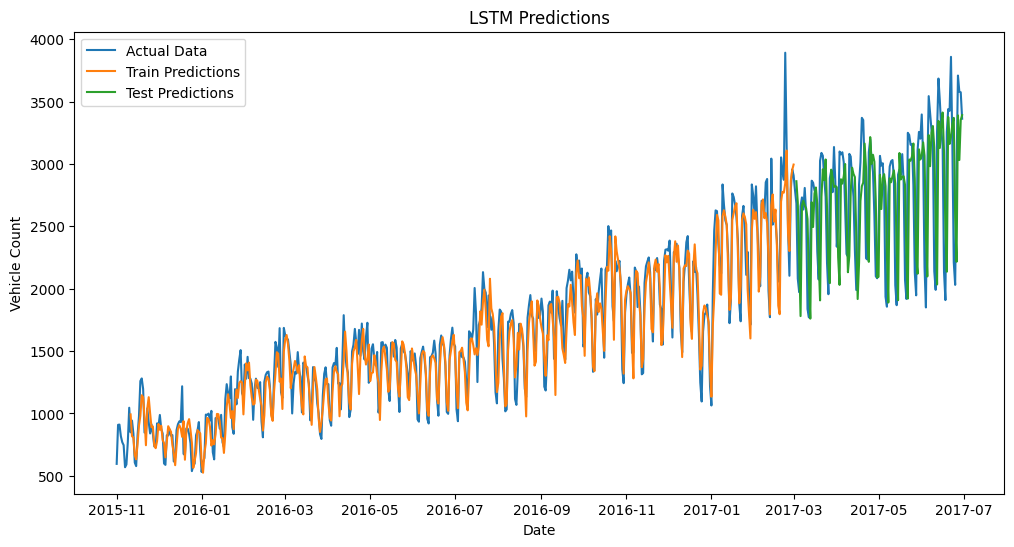

In [ ]:
# Load the data
data = pd.read_csv('C:/Users/PC/OneDrive/Documents/Timesr/traffic.csv')

# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Resample data to daily frequency
data.set_index('DateTime', inplace=True)
daily_data = data['Vehicles'].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1, verbose=1)

# Predicting and inverse transforming the values
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plotting train predictions
train_predictions_plot = np.empty_like(scaled_data)
train_predictions_plot[:, :] = np.nan
train_predictions_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(daily_data.index, train_predictions_plot, label='Train Predictions')

# Plotting test predictions
test_predictions_plot = np.empty_like(scaled_data)
test_predictions_plot[:, :] = np.nan

# Calculate correct start and end indices
start_index = len(scaled_data) - len(test_predict)
test_predictions_plot[start_index:, :] = test_predict

plt.plot(daily_data.index, test_predictions_plot, label='Test Predictions')

plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE, MAE, and MAPE for train and test sets
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
train_mape = calculate_mape(Y_train[0], train_predict[:,0])

test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])
test_mape = calculate_mape(Y_test[0], test_predict[:,0])

# Print all performance metrics
print(f'Train RMSE: {train_rmse}, Train MAE: {train_mae}, Train MAPE: {train_mape}%')
print(f'Test RMSE: {test_rmse}, Test MAE: {test_mae}, Test MAPE: {test_mape}%')


Train RMSE: 162.65451366094004, Train MAE: 121.74873707129521, Train MAPE: 8.17403142731814%
Test RMSE: 212.69651621125624, Test MAE: 159.90982157389323, Test MAPE: 5.842143603655435%


Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0158 - val_loss: 0.0132
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - val_loss: 0.0133
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0092 - val_loss: 0.0144
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - val_loss: 0.0144
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0102 - val_loss: 0.0125
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0126
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0118 - val_loss: 0.0135
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0094 - val_loss: 0.0124
Epoch 9/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0124
Epoch 10/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - val_loss: 0.0130
Epoch 11/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090 - val_loss: 0.0123
Epoch 12/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

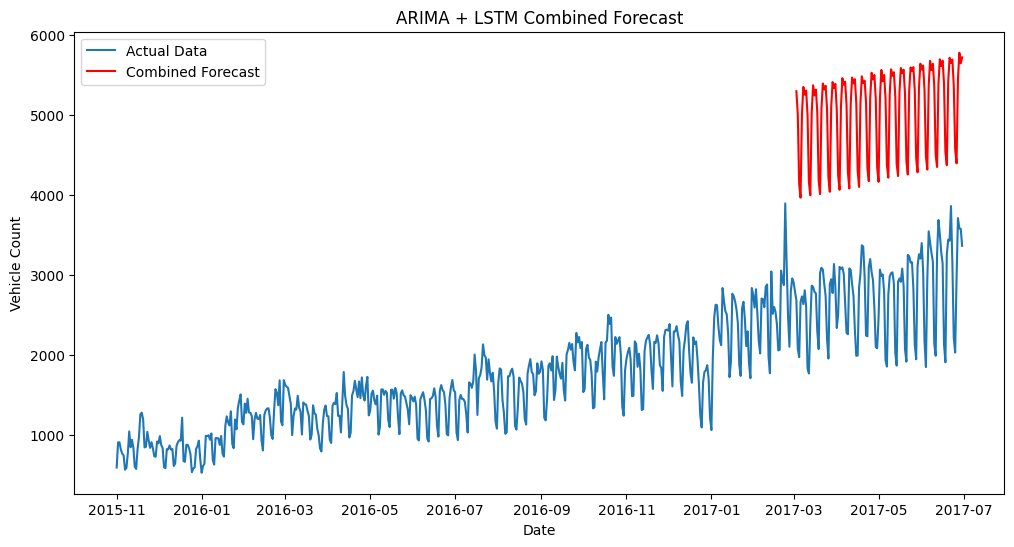

Combined Model RMSE: 5091.276726337979


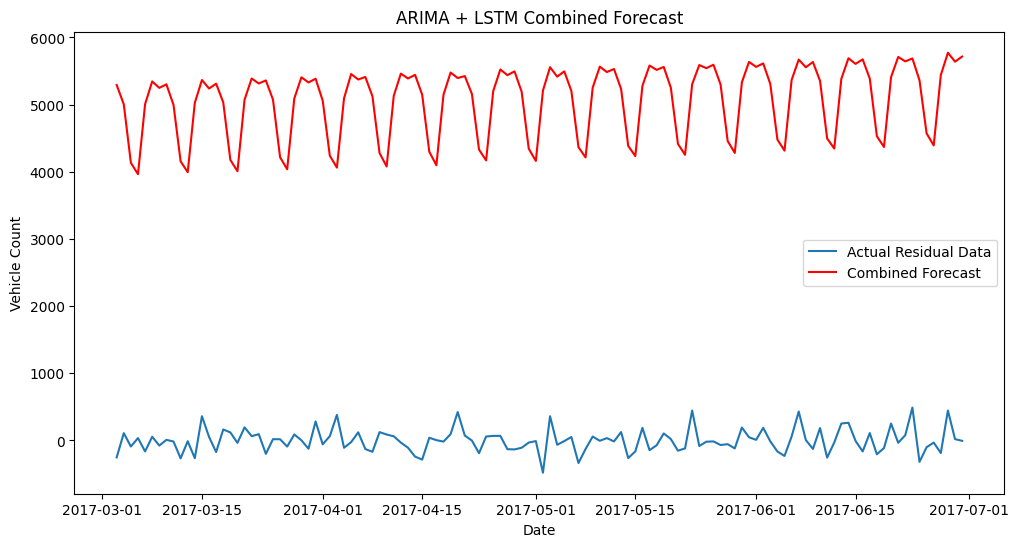

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model on the original data
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
m = 7

arima_model = SARIMAX(daily_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
arima_results = arima_model.fit()

# Get the residuals from ARIMA model
residuals = arima_results.resid
residuals = residuals.dropna()

# Normalize the residuals
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare the residual data for LSTM
X_residual, Y_residual = create_dataset(residuals_scaled, time_step)
X_residual = X_residual.reshape(X_residual.shape[0], X_residual.shape[1], 1)

# Split the residual data into training and testing sets
train_size_residual = int(len(X_residual) * 0.8)
test_size_residual = len(X_residual) - train_size_residual
X_residual_train, X_residual_test = X_residual[0:train_size_residual], X_residual[train_size_residual:len(X_residual)]
Y_residual_train, Y_residual_test = Y_residual[0:train_size_residual], Y_residual[train_size_residual:len(Y_residual)]

# Build and train the LSTM model on residuals
residual_model = Sequential()
residual_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
residual_model.add(LSTM(50, return_sequences=False))
residual_model.add(Dense(1))
residual_model.compile(optimizer='adam', loss='mean_squared_error')

residual_model.fit(X_residual_train, Y_residual_train, validation_data=(X_residual_test, Y_residual_test), epochs=50, batch_size=1, verbose=1)

# Predicting residuals and inverse transforming the values
residual_train_predict = residual_model.predict(X_residual_train)
residual_test_predict = residual_model.predict(X_residual_test)
residual_train_predict = scaler.inverse_transform(residual_train_predict)
residual_test_predict = scaler.inverse_transform(residual_test_predict)
Y_residual_train = scaler.inverse_transform([Y_residual_train])
Y_residual_test = scaler.inverse_transform([Y_residual_test])

# Combine ARIMA forecast and LSTM residuals
arima_forecast = arima_results.get_forecast(steps=len(daily_data))
arima_forecast_values = arima_forecast.predicted_mean[-test_size_residual:]
combined_forecast = arima_forecast_values + residual_test_predict[:,0]

# Calculate RMSE for the combined model
combined_rmse = np.sqrt(mean_squared_error(Y_residual_test[0], combined_forecast))
print(f'Combined Model RMSE: {combined_rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Actual Data')
plt.plot(daily_data.index[-test_size_residual:], combined_forecast, label='Combined Forecast', color='red')
plt.title('ARIMA + LSTM Combined Forecast')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()


# Calculate RMSE for the combined model
combined_rmse = np.sqrt(mean_squared_error(Y_residual_test[0], combined_forecast))
print(f'Combined Model RMSE: {combined_rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-len(Y_residual_test[0]):], Y_residual_test[0], label='Actual Residual Data')
plt.plot(daily_data.index[-len(combined_forecast):], combined_forecast, label='Combined Forecast', color='red')
plt.title('ARIMA + LSTM Combined Forecast')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()


20:49:54 - cmdstanpy - INFO - Chain [1] start processing
20:49:54 - cmdstanpy - INFO - Chain [1] done processing


SARIMA MAE: 103.38333075590448, MSE: 14161.659005577658, RMSE: 119.00276889878512
Prophet MAE: 184.72622413338368, MSE: 41503.65753186052, RMSE: 203.72446473573203


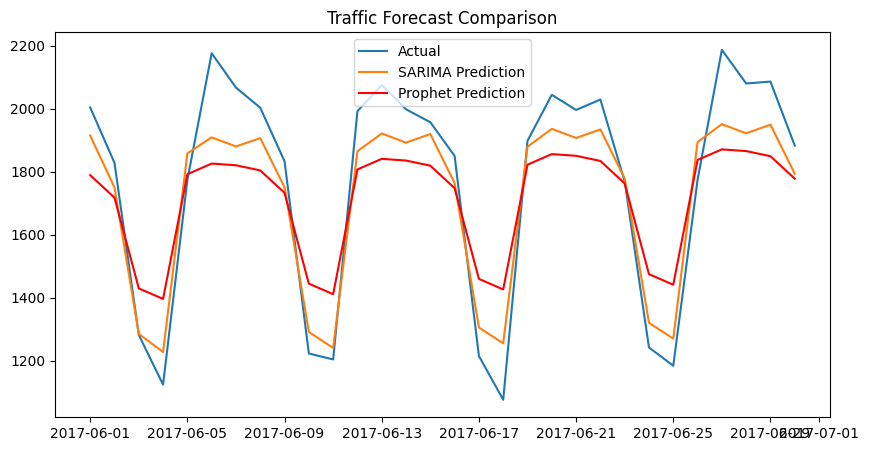

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt

# Load data
data = pd.read_csv('C:/Users/PC/OneDrive/Documents/Timesr/traffic.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Select a single junction for simplicity
data = data[data['Junction'] == 1]

# Resample data daily
daily_data = data['Vehicles'].resample('D').sum()

# Split data into train and test sets
train = daily_data.iloc[:-30]
test = daily_data.iloc[-30:]

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_results = sarima_model.fit()

# Prophet Model
df = train.reset_index().rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df)
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

# Predictions
sarima_pred = sarima_results.forecast(30)
prophet_pred = prophet_forecast['yhat'][-30:]

# Evaluation
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = sqrt(mse)
    return mae, mse, rmse

sarima_eval = evaluate_model(test, sarima_pred)
prophet_eval = evaluate_model(test, prophet_pred.values)

# Print evaluation metrics
print(f"SARIMA MAE: {sarima_eval[0]}, MSE: {sarima_eval[1]}, RMSE: {sarima_eval[2]}")
print(f"Prophet MAE: {prophet_eval[0]}, MSE: {prophet_eval[1]}, RMSE: {prophet_eval[2]}")

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_pred, label='SARIMA Prediction')
plt.plot(test.index, prophet_pred.values, label='Prophet Prediction', color='red')
plt.legend()
plt.title('Traffic Forecast Comparison')
plt.show()
